In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [2]:
train_set=pd.read_csv("./digit-recognizer/train.csv")
train_set_X=train_set.copy()
train_set_X.drop("label",axis=1,inplace=True)
train_set_Y=train_set["label"]
test_set=pd.read_csv("./digit-recognizer/test.csv")
train_set_X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_set_X.shape


(42000, 784)

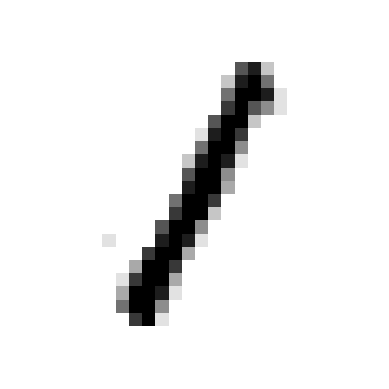

In [4]:
some_digit=train_set_X.iloc[26000]
some_digit_image=np.reshape(some_digit,(28,28))
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
 interpolation="nearest")
plt.axis("off")
plt.show()


In [5]:
train_set_Y.iloc[26000]

1

In [6]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(train_set_X,train_set_Y)

SGDClassifier(random_state=42)

In [7]:
sgd_clf.predict([some_digit])

C:\Users\aayus\work\ML_Path\.env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [8]:
some_digit_scores=sgd_clf.decision_function([some_digit])

print(some_digit_scores)
print(np.argmax(some_digit_scores))

[[-46690.06803141   9124.6574176    -525.38258062  -3517.03999521
  -37818.60014793  -7856.35637506 -15609.11307678 -25233.17415881
   -3311.87164102 -11365.05719192]]
1


C:\Users\aayus\work\ML_Path\.env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
cv_scores=cross_val_score(sgd_clf,train_set_X,train_set_Y,cv=5,scoring='accuracy')
print("cv_scores:",cv_scores)

cv_scores: [0.88309524 0.85892857 0.8827381  0.86464286 0.87964286]


In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
train_set_Y_pred=cross_val_predict(sgd_clf,train_set_X,train_set_Y,cv=3)
print(confusion_matrix(train_set_Y,train_set_Y_pred))


[[4022    0   17    8    6    9   25    3   27   15]
 [   2 4519   33   10    6   20   18    4   51   21]
 [  69   43 3629   65   73   22   83   50  115   28]
 [  36   17  214 3597   14  157   40   32  163   81]
 [  17   23   23    9 3626   15   27   14   42  276]
 [  77   22   62  208   73 2726  132   16  360  119]
 [  53    7   67    3   33   34 3887    2   50    1]
 [  24   19   61   31   60   14    7 3880   36  269]
 [  38   87   65  151   54  209   41   18 3227  173]
 [  19   17   18   59  267   51    0  117   55 3585]]


In [11]:
precision=precision_score(train_set_Y,train_set_Y_pred,average='micro')
recall=recall_score(train_set_Y,train_set_Y_pred,average='micro')
print('precision:',precision)
print('recall:',recall)

precision: 0.8737619047619047
recall: 0.8737619047619047


In [12]:
prediction=sgd_clf.predict(test_set)


In [14]:
import csv
with open('Result.csv','w',newline='') as csvfile:
    csvwriter=csv.writer(csvfile)
    datarow=['ImageId','Label']
    csvwriter.writerow(datarow)
    id=1
    for i in prediction:
        data=[id,i]
        csvwriter.writerow(data)
        id=id+1
